# Strain mapping with all calibrations
# 1A: Preprocess

All the steps in this notebook are optional.  They may be helpful in facilitating smooth data access later (file loading and format conversion), in compressing data to a more manageable size (binning, cropping), or in cleaning the data for higher accuracy measurements (background subtraction).

- Inputs:
  - raw 4D-STEM scan
- Outputs:
  - processed 4D-STEM scan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import py4DSTEM

### Experimental data

In [2]:
fp = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/Particle_1_Stack_1_60x110_ss30nm_0p09s_spot8_alpha=0p48_bin2_cl-600mm_300kV.dm4"
dc = py4DSTEM.file.io.read(fp)
dc.set_scan_shape(110,60)
dc.data = np.roll(dc.data,-2,axis=1)

/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/Particle_1_Stack_1_60x110_ss30nm_0p09s_spot8_alpha=0p48_bin2_cl-600mm_300kV.dm4 is not a py4DSTEM file.
Reading with hyperspy...


In [3]:
dc.data.shape

(110, 60, 1024, 1024)

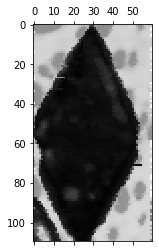

In [4]:
im = np.average(dc.data,axis=(2,3))

fig,ax = plt.subplots()
ax.matshow(im)
plt.show()

In [5]:
dc.crop_data_real(0,50,0,53)

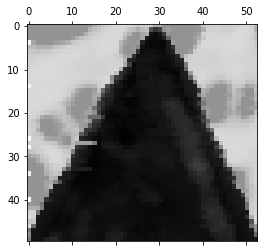

In [6]:
im = np.average(dc.data,axis=(2,3))

fig,ax = plt.subplots()
ax.matshow(im)
plt.show()

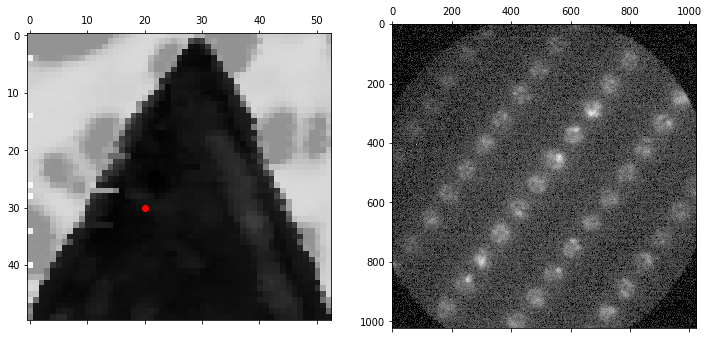

In [7]:
rx,ry = 30,20

fig,axs = plt.subplots(1,2,figsize=(12,12))
axs[0].matshow(im)
axs[0].scatter(ry,rx,color='r')
axs[1].matshow(dc.data[rx,ry,:,:]**0.5)
plt.show()

In [8]:
dc.bin_data_real(2)
im = np.average(dc.data,axis=(2,3))

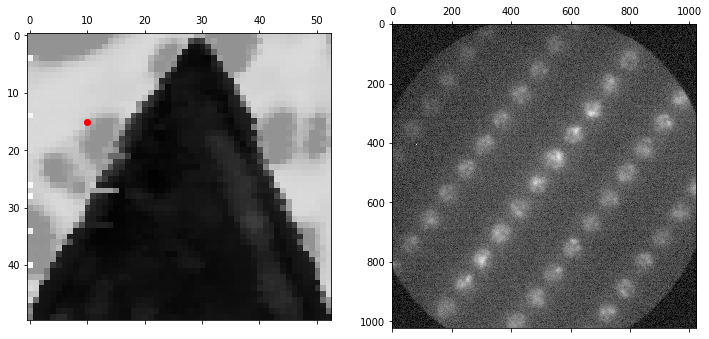

In [9]:
rx,ry = 15,10

fig,axs = plt.subplots(1,2,figsize=(12,12))
axs[0].matshow(im)
axs[0].scatter(ry,rx,color='r')
axs[1].matshow(dc.data[rx,ry,:,:]**0.5)
plt.show()

In [17]:
dc.bin_data_diffraction(2)

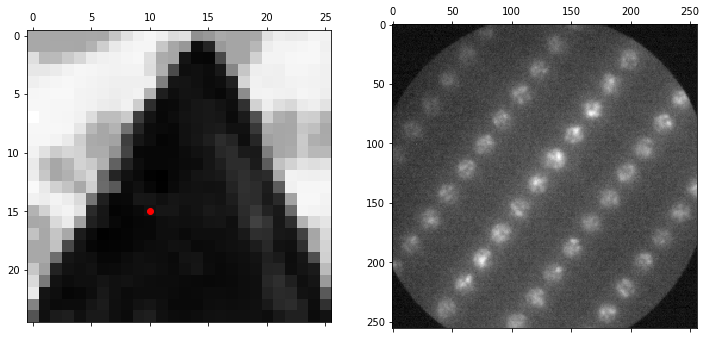

In [18]:
rx,ry = 15,10

fig,axs = plt.subplots(1,2,figsize=(12,12))
axs[0].matshow(im)
axs[0].scatter(ry,rx,color='r')
axs[1].matshow(dc.data[rx,ry,:,:]**0.5)
plt.show()

In [15]:
savepath = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_particle1_LFP100.h5"
py4DSTEM.file.io.save(dc,savepath)

Creating file /media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_particle1_LFP100_2.h5...
Done.


### Vacuum scan

In [19]:
fp = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/Vacuum_Probe_25x25_ss30nm_0p001s_spot8_alpha=0p48_bin2_cl-600mm_300kV.dm4"
dc = py4DSTEM.file.io.read(fp)
dc.set_scan_shape(25,25)
dc.data = np.roll(dc.data,-2,axis=1)

/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/Vacuum_Probe_25x25_ss30nm_0p001s_spot8_alpha=0p48_bin2_cl-600mm_300kV.dm4 is not a py4DSTEM file.
Reading with hyperspy...


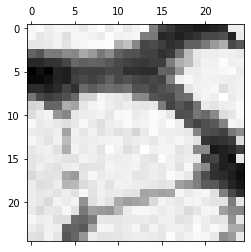

In [20]:
im = np.average(dc.data,axis=(2,3))

fig,ax = plt.subplots()
ax.matshow(im)
plt.show()

In [25]:
dc.crop_data_real(0,20,0,20)
dc.bin_data_real(2)
dc.bin_data_diffraction(4)

In [27]:
im = np.average(dc.data,axis=(2,3))

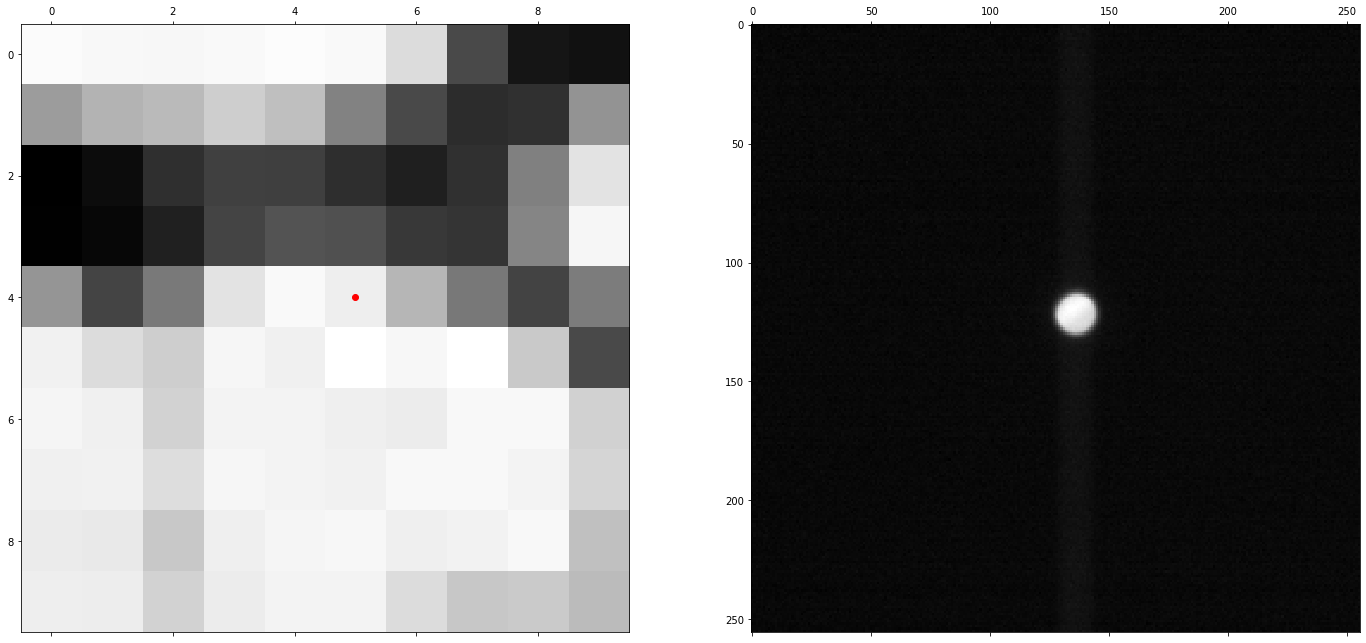

In [30]:
rx,ry = 4,5

fig,axs = plt.subplots(1,2,figsize=(24,24))
axs[0].matshow(im)
axs[0].scatter(ry,rx,color='r')
axs[1].matshow(dc.data[rx,ry,:,:]**0.5)
plt.show()

In [31]:
savepath = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_vacuumscan.h5"
py4DSTEM.file.io.save(dc,savepath)

Creating file /media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_vacuumscan.h5...
Done.


### Al standard

In [32]:
fp = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/Al_STD_30x30_ss30nm_0p1s_spot8_alpha=0p48_bin2_cl-600mm_300kV.dm4"
dc = py4DSTEM.file.io.read(fp)
dc.set_scan_shape(30,30)
dc.data = np.roll(dc.data,-2,axis=1)

/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/Al_STD_30x30_ss30nm_0p1s_spot8_alpha=0p48_bin2_cl-600mm_300kV.dm4 is not a py4DSTEM file.
Reading with hyperspy...


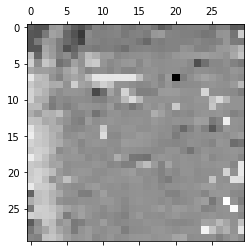

In [33]:
im = np.average(dc.data,axis=(2,3))

fig,ax = plt.subplots()
ax.matshow(im)
plt.show()

In [34]:
dc.bin_data_real(2)
dc.bin_data_diffraction(4)

In [35]:
im = np.average(dc.data,axis=(2,3))

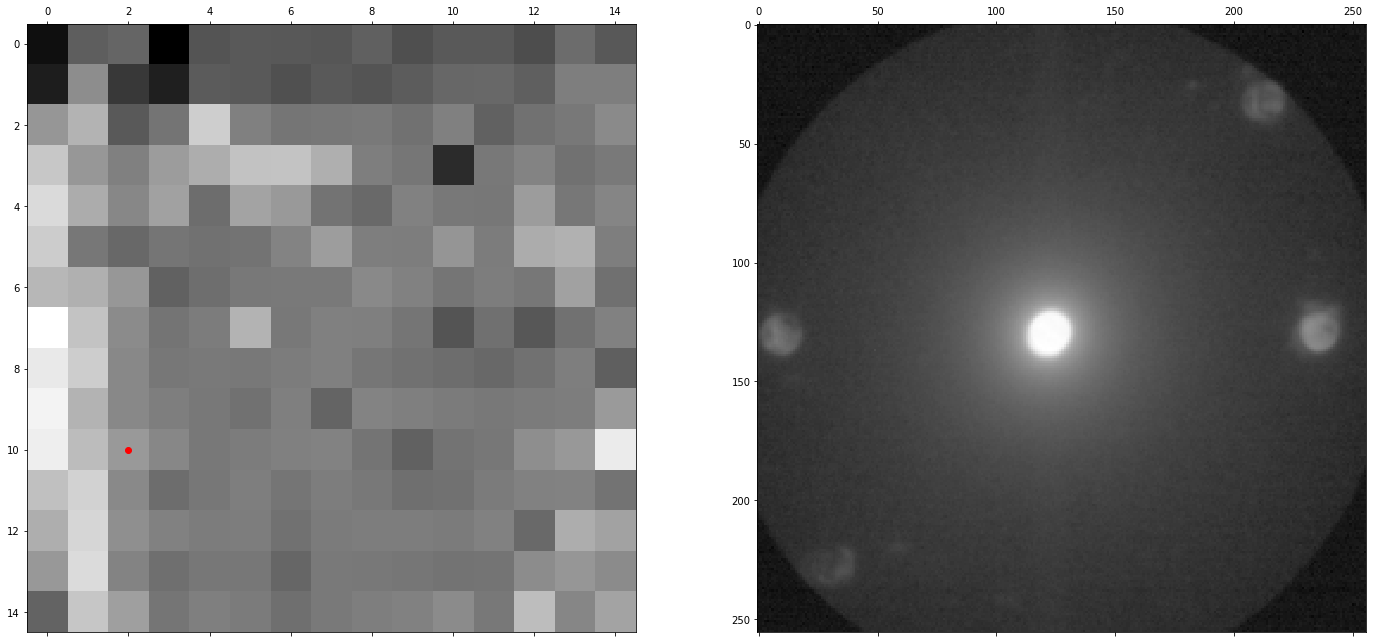

In [43]:
rx,ry = 10,2

fig,axs = plt.subplots(1,2,figsize=(24,24))
axs[0].matshow(im)
axs[0].scatter(ry,rx,color='r')
axs[1].matshow(dc.data[rx,ry,:,:]**0.1)
plt.show()

In [45]:
savepath = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_Alstd.h5"
py4DSTEM.file.io.save(dc,savepath)

Creating file /media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_Alstd.h5...
Done.


### HAADF and CBED

In [47]:
import hyperspy.api_nogui as hs

In [52]:
fp = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/Particle_3_Orientation.dm4"
CBED = hs.load(fp).data

fp = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/Particle_3_Stack_1 4DS-START-IMAGE.tif"
HAADF = hs.load(fp).data

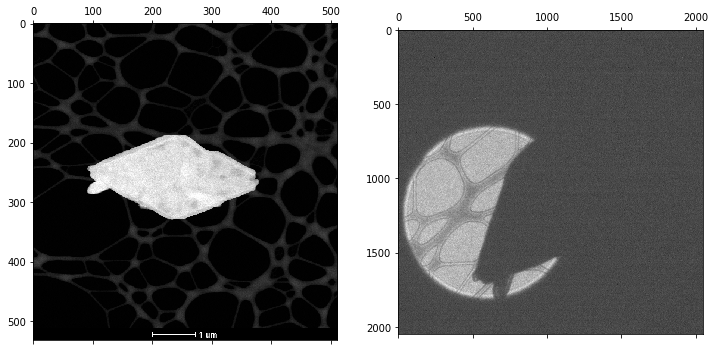

In [53]:
fig,axs = plt.subplots(1,2,figsize=(12,12))
axs[0].matshow(HAADF)
axs[1].matshow(CBED)
plt.show()

In [55]:
savepath = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_HAADF.h5"
py4DSTEM.file.io.save(py4DSTEM.file.datastructure.RealSlice(data=HAADF),savepath)

savepath = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_CBED.h5"
py4DSTEM.file.io.save(py4DSTEM.file.datastructure.RealSlice(data=CBED),savepath)

Creating file /media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_HAADF.h5...
Done.
Creating file /media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_CBED.h5...
Done.


### Bundle all the data into one file

In [3]:
fp_data = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_particle1_LFP100.h5"
fp_vacuum = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_vacuumscan.h5"
fp_cal = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_Alstd.h5"
fp_HAADF = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_HAADF.h5"
fp_CBED = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_CBED.h5"

data = py4DSTEM.file.io.read(fp_data)
vacuum = py4DSTEM.file.io.read(fp_vacuum)
cal = py4DSTEM.file.io.read(fp_cal)
HAADF = py4DSTEM.file.io.read(fp_HAADF)
CBED = py4DSTEM.file.io.read(fp_CBED)

data.name = "experimental_4DSTEM_scan"
vacuum.name = "vacuum_4DSTEM_scan"
cal.name = "calibration_4DSTEM_scan"
HAADF.name = "HAADF_image"
CBED.name = "CBED_shadow_image"

savepath = "/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata.h5"
py4DSTEM.file.io.save([data,vacuum,cal,HAADF,CBED],savepath)

/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_particle1_LFP100.h5 is a py4DSTEM file, v0.6. Reading...
/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_vacuumscan.h5 is a py4DSTEM file, v0.6. Reading...
/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_Alstd.h5 is a py4DSTEM file, v0.6. Reading...
/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_HAADF.h5 is a py4DSTEM file, v0.6. Reading...
/media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata_CBED.h5 is a py4DSTEM file, v0.6. Reading...
Creating file /media/AuxDriveB/Data/20190904_StrainMappingExample_with_Calibrations/sampledata.h5...
Done.
